# CH08 - 8.6.2.3

In [29]:
from util.VisualizeDataset import VisualizeDataset
from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.Evaluation import RegressionEvaluation
from Chapter8.LearningAlgorithmsTemporal import TemporalClassificationAlgorithms
from Chapter8.LearningAlgorithmsTemporal import TemporalRegressionAlgorithms
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import pandas as pd
import os
import copy
from util import util
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = [15,10]

In [30]:
rawdatapth = "data/result-given/"
outputpth = "data/intermediate/"

if not os.path.exists(outputpth):
    print("Empty path, so creating..." + outputpth + "...done!")
    os.makedirs(outputpth)

In [31]:
dataset = pd.read_csv(rawdatapth + "chapter5_result.csv", index_col=0)
dataset.index = pd.to_datetime(dataset.index)
dataset

,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,gyr_watch_x,...,mag_watch_z_freq_1.2_Hz_ws_40,mag_watch_z_freq_1.3_Hz_ws_40,mag_watch_z_freq_1.4_Hz_ws_40,mag_watch_z_freq_1.5_Hz_ws_40,mag_watch_z_freq_1.6_Hz_ws_40,mag_watch_z_freq_1.7_Hz_ws_40,mag_watch_z_freq_1.8_Hz_ws_40,mag_watch_z_freq_1.9_Hz_ws_40,mag_watch_z_freq_2.0_Hz_ws_40,cluster
2016-02-08 18:28:25.656222,-0.090433,0.164264,9.631744,9.550840,0.197679,1.513430,-0.008810,0.018548,-0.001514,0.001668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2016-02-08 18:28:28.406222,-0.088630,0.170400,9.628089,9.551315,0.197073,1.505779,-0.008870,0.018457,-0.000912,0.001715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2016-02-08 18:28:31.156222,-0.084584,0.171914,9.620668,9.552778,0.194151,1.509347,-0.008438,0.018855,0.000159,0.002014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2016-02-08 18:28:33.906222,-0.081381,0.170345,9.634230,9.546574,0.200030,1.507089,-0.008650,0.018903,-0.003626,0.002016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2016-02-08 18:28:36.656222,-0.097313,0.136100,9.623921,9.545983,0.197746,1.516108,-0.011363,0.015230,-0.023521,0.002096,...,-1.187140e+00,1.130804e+00,-4.046004e-01,1.012557e+00,1.166098e+00,5.130568e-01,3.791358e-01,3.274394e-01,3.076108e-01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08 20:40:53.156222,-0.163787,0.183251,9.611648,-5.261667,-5.561800,7.313867,-0.008054,0.020805,0.001829,0.358750,...,-1.115552e-12,1.172396e-12,-1.342926e-12,1.310951e-12,-1.346478e-12,1.378453e-12,-1.460165e-12,1.517009e-12,-1.524114e-12,2
2016-02-08 20:40:55.906222,-0.163480,0.184232,9.614230,-5.261667,-5.561800,7.313867,-0.008538,0.021053,0.001998,0.358750,...,-1.115552e-12,1.172396e-12,-1.342926e-12,1.310951e-12,-1.346478e-12,1.378453e-12,-1.460165e-12,1.517009e-12,-1.524114e-12,2
2016-02-08 20:40:58.656222,-0.164780,0.184331,9.615484,-5.261667,-5.561800,7.313867,-0.008474,0.021411,0.002339,0.358750,...,-1.115552e-12,1.172396e-12,-1.342926e-12,1.310951e-12,-1.346478e-12,1.378453e-12,-1.460165e-12,1.517009e-12,-1.524114e-12,2
2016-02-08 20:41:01.406222,-0.162506,0.185287,9.608581,-5.261667,-5.561800,7.313867,-0.008452,0.021322,0.002050,0.358750,...,-1.115552e-12,1.172396e-12,-1.342926e-12,1.310951e-12,-1.346478e-12,1.378453e-12,-1.460165e-12,1.517009e-12,-1.524114e-12,2


In [32]:
dataset.index = pd.to_datetime(dataset.index)
dataset.columns

Index(['acc_phone_x', 'acc_phone_y', 'acc_phone_z', 'acc_watch_x',
       'acc_watch_y', 'acc_watch_z', 'gyr_phone_x', 'gyr_phone_y',
       'gyr_phone_z', 'gyr_watch_x',
       ...
       'mag_watch_z_freq_1.2_Hz_ws_40', 'mag_watch_z_freq_1.3_Hz_ws_40',
       'mag_watch_z_freq_1.4_Hz_ws_40', 'mag_watch_z_freq_1.5_Hz_ws_40',
       'mag_watch_z_freq_1.6_Hz_ws_40', 'mag_watch_z_freq_1.7_Hz_ws_40',
       'mag_watch_z_freq_1.8_Hz_ws_40', 'mag_watch_z_freq_1.9_Hz_ws_40',
       'mag_watch_z_freq_2.0_Hz_ws_40', 'cluster'],
      dtype='object', length=542)

In [33]:
DataViz = VisualizeDataset()
prepare = PrepareDatasetForLearning()

In [34]:
Xtrain, Xtest, ytrain, ytest = prepare.split_single_dataset_regression_by_time(dataset, 'hr_watch_rate', '2016-02-08 18:29:56', \
                                                                                   '2016-02-08 19:34:07', '2016-02-08 20:07:50')

In [35]:
print('Training set length is: ', len(Xtrain.index))
print('Test set length is: ', len(Xtest.index))

Training set length is:  1401
Test set length is:  736


In [36]:
basicfeatures = ['acc_phone_x','acc_phone_y','acc_phone_z','acc_watch_x','acc_watch_y','acc_watch_z','gyr_phone_x','gyr_phone_y','gyr_phone_z','gyr_watch_x','gyr_watch_y','gyr_watch_z',
                  'labelOnTable','labelSitting','labelWashingHands','labelWalking','labelStanding','labelDriving','labelEating','labelRunning',
                  'light_phone_lux','mag_phone_x','mag_phone_y','mag_phone_z','mag_watch_x','mag_watch_y','mag_watch_z','press_phone_pressure']
pcafeatures = ['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7']
timefeatures = [name for name in dataset.columns if ('temp_' in name and not 'hr_watch' in name)]
freqfeatures = [name for name in dataset.columns if (('_freq' in name) or ('_pse' in name))]

In [37]:
print('#basic features: ', len(basicfeatures))
print('#PCA features: ', len(pcafeatures))
print('#time features: ', len(timefeatures))
print('#frequency features: ', len(freqfeatures))

#basic features:  28
#PCA features:  7
#time features:  71
#frequency features:  432


In [38]:
clusterfeatures = ['cluster']
print('#cluster features: ', len(clusterfeatures))

#cluster features:  1


In [39]:
featuresch03 = list(set().union(basicfeatures, pcafeatures))
featuresch04 = list(set().union(basicfeatures, pcafeatures, timefeatures, freqfeatures))
featuresch05 = list(set().union(basicfeatures, pcafeatures, timefeatures, freqfeatures, clusterfeatures))

In [49]:
selectedfeatures = ['temp_pattern_labelOnTable','labelOnTable', 'temp_pattern_labelOnTable(b)labelOnTable', 'cluster',
                     'pca_1_temp_mean_ws_120','pca_2_temp_mean_ws_120','pca_2','acc_watch_y_temp_mean_ws_120','gyr_watch_y_pse',
                     'gyr_watch_x_pse']
possiblefeatures = [basicfeatures, featuresch03, featuresch04, featuresch05, selectedfeatures]
featurenames = ['initial set', 'Chapter 3', 'Chapter 4', 'Chapter 5', 'Selected features']

Figure saved to figures\figure_2.png


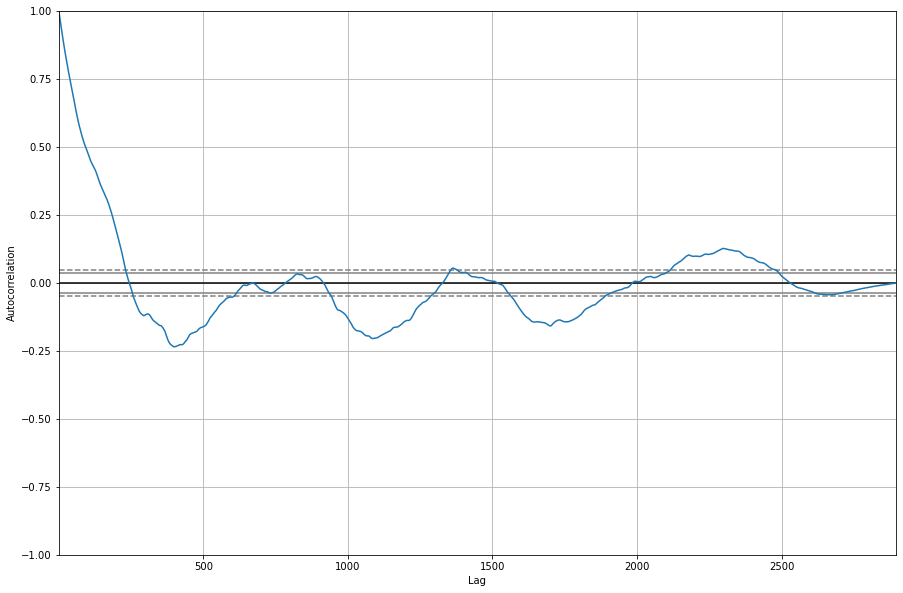

In [50]:
dftest = adfuller(dataset['hr_watch_rate'], autolag='AIC')

plt.Figure(); autocorrelation_plot(dataset['hr_watch_rate'])
DataViz.save(plt)
plt.show()

In [51]:
learner = TemporalRegressionAlgorithms()
eval = RegressionEvaluation()

In [56]:
repeats = 1
washouttime = 10
scores = []

In [57]:
for i in range(0, len(possiblefeatures)):
    selXtrain = Xtrain[possiblefeatures[i]]
    selXtest = Xtest[possiblefeatures[i]]
    
    performance_tr_res = 0
    performance_tr_res_std = 0
    performance_te_res = 0
    performance_te_res_std = 0
    performance_tr_rnn = 0
    performance_tr_rnn_std = 0
    performance_te_rnn = 0
    performance_te_rnn_std = 0
    
    for repeat in range(0, repeats):
        
        ytrainregr, ytestregr = learner.reservoir_computing(selXtrain, ytrain, selXtest, ytest, gridsearch=True, per_time_step=False)

        mean_tr, std_tr = eval.mean_squared_error_with_std(ytrain.iloc[washouttime:,], ytrainregr.iloc[washouttime:,])
        mean_te, std_te = eval.mean_squared_error_with_std(ytest.iloc[washouttime:,], ytestregr.iloc[washouttime:,])

        performance_tr_res += mean_tr
        performance_tr_res_std += std_tr
        performance_te_res += mean_te
        performance_te_res_std += std_te

        ytrainregr, ytestregr = learner.recurrent_neural_network(selXtrain, ytrain, selXtest, ytest, gridsearch=True)

        mean_tr, std_tr = eval.mean_squared_error_with_std(ytrain.iloc[washouttime:,], ytrainregr.iloc[washouttime:,])
        mean_te, std_te = eval.mean_squared_error_with_std(ytest.iloc[washouttime:,], ytestregr.iloc[washouttime:,])

        performance_tr_rnn += mean_tr
        performance_tr_rnn_std += std_tr
        performance_te_rnn += mean_te
        performance_te_rnn_std += std_te
        
    if (featurenames[i] == 'initial set'):
        ytrainregr, ytestregr = learner.time_series(selXtrain, ytrain, selXtest, ytest, gridsearch=True)

        mean_tr, std_tr = eval.mean_squared_error_with_std(ytrain.iloc[washouttime:,], ytrainregr.iloc[washouttime:,])
        mean_te, std_te = eval.mean_squared_error_with_std(ytest.iloc[washouttime:,], ytestregr.iloc[washouttime:,])

        overall_performance_tr_ts = mean_tr
        overall_performance_tr_ts_std = std_tr
        overall_performance_te_ts = mean_te
        overall_performance_te_ts_std = std_te
    else:
        overall_performance_tr_ts = 0
        overall_performance_tr_ts_std = 0
        overall_performance_te_ts = 0
        overall_performance_te_ts_std = 0
        
    overall_performance_tr_res = performance_tr_res/repeats
    overall_performance_tr_res_std = performance_tr_res_std/repeats
    overall_performance_te_res = performance_te_res/repeats
    overall_performance_te_res_std = performance_te_res_std/repeats
    overall_performance_tr_rnn = performance_tr_rnn/repeats
    overall_performance_tr_rnn_std = performance_tr_rnn_std/repeats
    overall_performance_te_rnn = performance_te_rnn/repeats
    overall_performance_te_rnn_std = performance_te_rnn_std/repeats

    scores_with_sd = [(overall_performance_tr_res, overall_performance_tr_res_std, overall_performance_te_res, overall_performance_te_res_std),
                      (overall_performance_tr_rnn, overall_performance_tr_rnn_std, overall_performance_te_rnn, overall_performance_te_rnn_std),
                      (overall_performance_tr_ts, overall_performance_tr_ts_std, overall_performance_te_ts, overall_performance_te_ts_std)]
    util.print_table_row_performances_regression(featurenames[i], len(selXtrain.index), len(selXtest.index), scores_with_sd)
    scores.append(scores_with_sd)

[0.6, 400]
[0.6, 700]
[0.6, 1000]
[0.8, 400]
[0.8, 700]
[0.8, 1000]
-------
[0.6, 1000]
-------
[50, 250, True]
[50, 500, True]
[100, 250, True]
[100, 500, True]
-------
[50, 250, True]
-------
[0, 0, 1]
[0, 5, 1]
[5, 0, 1]
[5, 5, 1]
-------
[0, 5, 1]
-------
initial set
 & 3272.6923\emph{( 4160.4296 )}  & 5850.6083\emph{( 5218.9886 )} & 4206.6698\emph{( 4799.9901 )}  & 3065.2214\emph{( 3379.6650 )} & 1566.4693\emph{( 1211.9096 )}  & 1349.1695\emph{( 947.6134 )}\\\hline
[0.6, 400]
[0.6, 700]
[0.6, 1000]
[0.8, 400]
[0.8, 700]
[0.8, 1000]
-------
[0.6, 400]
-------
[50, 250, True]
[50, 500, True]
[100, 250, True]
[100, 500, True]
-------
[50, 250, True]
-------
Chapter 3
 & 2603.8626\emph{( 3393.8064 )}  & 4569.0690\emph{( 4366.1992 )} & 3554.9154\emph{( 4152.5909 )}  & 2936.2870\emph{( 3320.8155 )} & 0.0000\emph{( 0.0000 )}  & 0.0000\emph{( 0.0000 )}\\\hline
[0.6, 400]
[0.6, 700]
[0.6, 1000]
[0.8, 400]
[0.8, 700]
[0.8, 1000]
-------
[0.6, 1000]
-------
[50, 250, True]
[50, 500, True]
[1

Figure saved to figures\figure_3.png


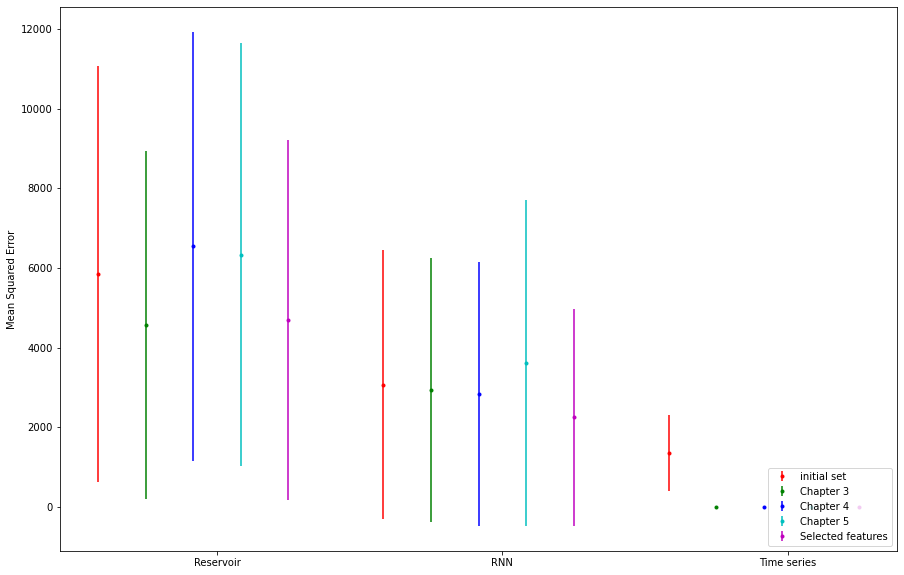

In [58]:
DataViz.plot_performances_regression(['Reservoir', 'RNN', 'Time series'], featurenames, scores)

Figure saved to figures\figure_6.png


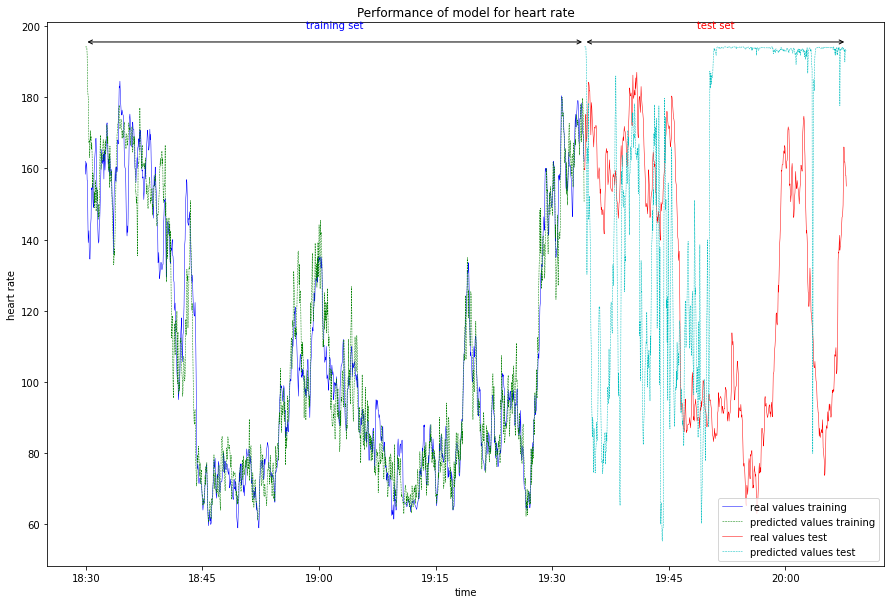

[50, 250, True]
[50, 500, True]
[100, 250, True]
[100, 500, True]
-------
[50, 250, True]
-------
Figure saved to figures\figure_7.png


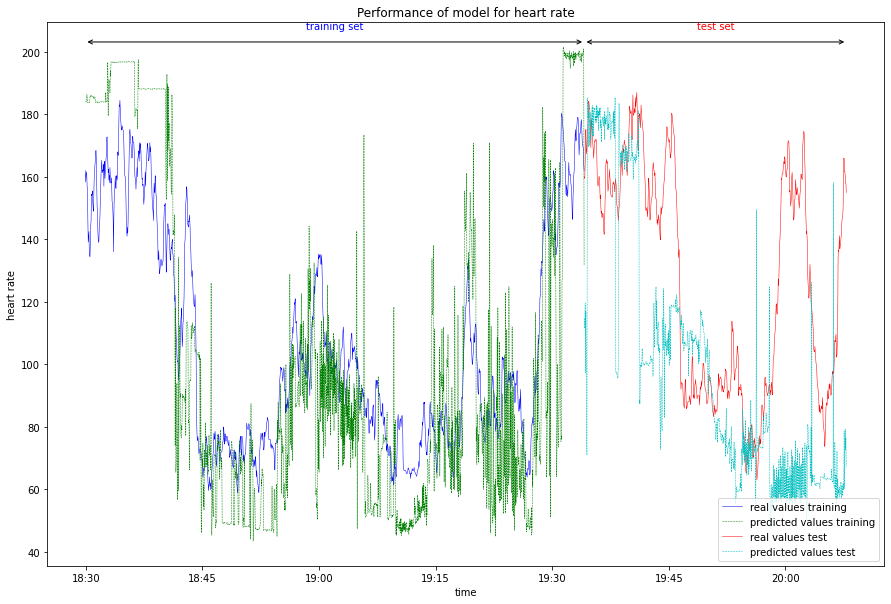

[0, 0, 1]
[0, 5, 1]
[5, 0, 1]
[5, 5, 1]
-------
[0, 5, 1]
-------
Figure saved to figures\figure_8.png


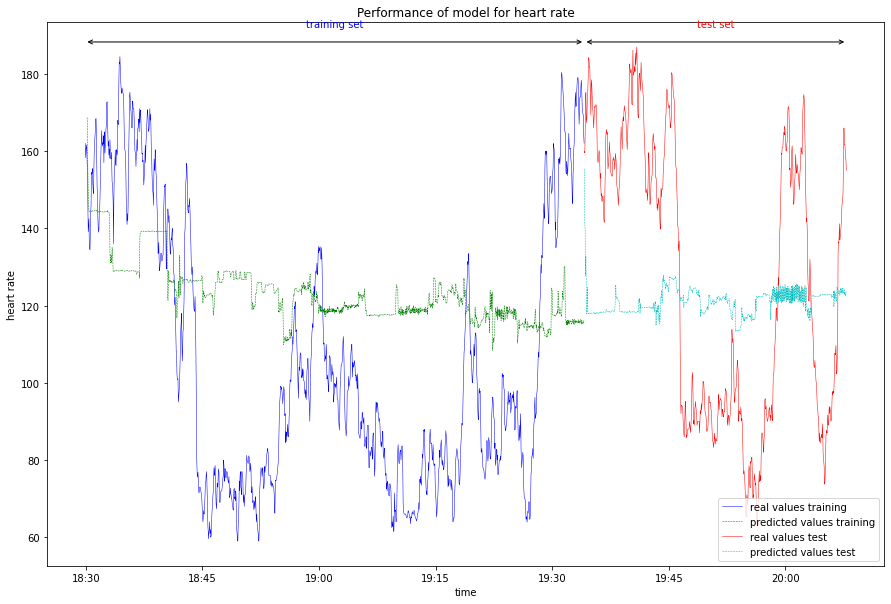

In [60]:
ytrainregr, ytestregr = learner.reservoir_computing(Xtrain[featuresch05], ytrain, Xtest[featuresch05], ytest, gridsearch=False)
DataViz.plot_numerical_prediction_versus_real(Xtrain.index, ytrain, ytrainregr['hr_watch_rate'], Xtest.index, ytest, ytestregr['hr_watch_rate'], 'heart rate')
ytrainregr, ytestregr = learner.recurrent_neural_network(Xtrain[basicfeatures], ytrain, Xtest[basicfeatures], ytest, gridsearch=True)
DataViz.plot_numerical_prediction_versus_real(Xtrain.index, ytrain, ytrainregr['hr_watch_rate'], Xtest.index, ytest, ytestregr['hr_watch_rate'], 'heart rate')
ytrainregr, ytestregr = learner.time_series(Xtrain[basicfeatures], ytrain, Xtest[basicfeatures], ytest, gridsearch=True)
DataViz.plot_numerical_prediction_versus_real(Xtrain.index, ytrain, ytrainregr['hr_watch_rate'], Xtest.index, ytest, ytestregr['hr_watch_rate'], 'heart rate')

Figure saved to figures\figure_9.png


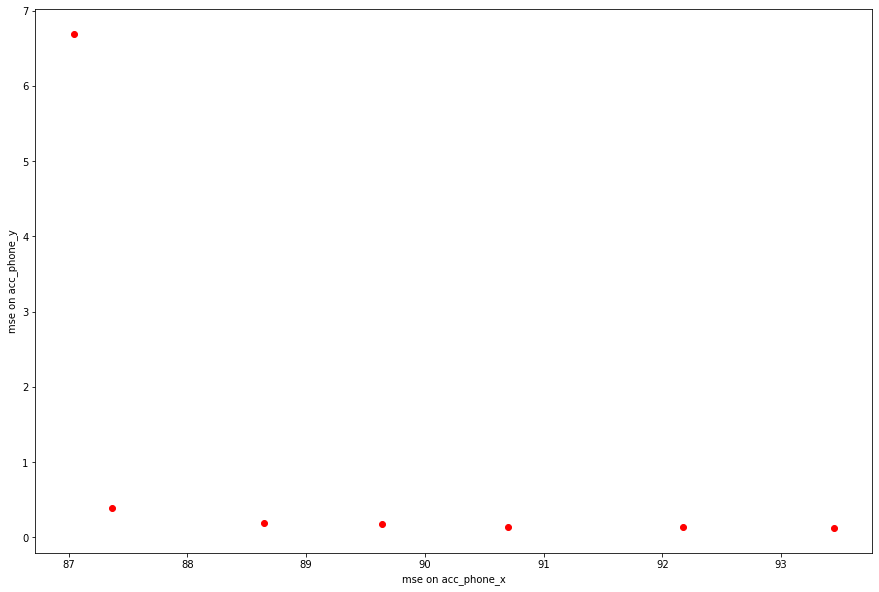

In [61]:
Xtrain, Xtest, ytrain, ytest = prepare.split_single_dataset_regression(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y'], 0.9, filter=False, temporal=True)

outputsets = learner.dynamical_systems_model_nsga_2(Xtrain, ytrain, Xtest, ytest, ['self.acc_phone_x', 'self.acc_phone_y', 'self.acc_phone_z'],
                                                     ['self.a * self.acc_phone_x + self.b * self.acc_phone_y', 'self.c * self.acc_phone_y + self.d * self.acc_phone_z', 'self.e * self.acc_phone_x + self.f * self.acc_phone_z'],
                                                     ['self.acc_phone_x', 'self.acc_phone_y'],
                                                     ['self.a', 'self.b', 'self.c', 'self.d', 'self.e', 'self.f'],
                                                     pop_size=10, max_generations=10, per_time_step=True)
DataViz.plot_pareto_front(outputsets)

Figure saved to figures\figure_10.png


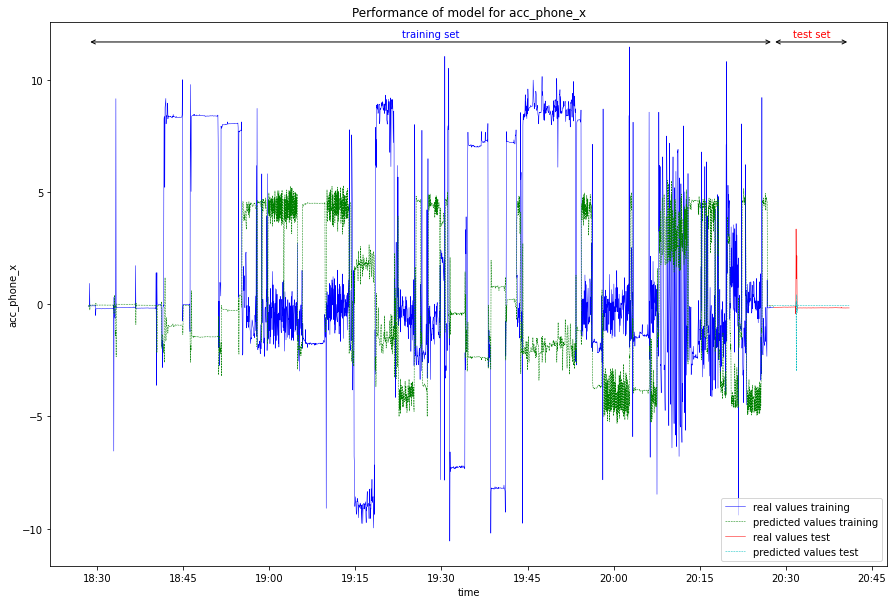

In [62]:
DataViz.plot_numerical_prediction_versus_real_dynsys_mo(Xtrain.index, ytrain, Xtest.index, ytest, outputsets, 0, 'acc_phone_x')

In [ ]:
regr_train_y, regr_test_y = learner.dynamical_systems_model_ga(train_X, train_y, test_X, test_y, ['self.acc_phone_x', 'self.acc_phone_y', 'self.acc_phone_z'],
                                                     ['self.a * self.acc_phone_x + self.b * self.acc_phone_y', 'self.c * self.acc_phone_y + self.d * self.acc_phone_z', 'self.e * self.acc_phone_x + self.f * self.acc_phone_z'],
                                                     ['self.acc_phone_x', 'self.acc_phone_y'],
                                                     ['self.a', 'self.b', 'self.c', 'self.d', 'self.e', 'self.f'],
                                                     pop_size=5, max_generations=10, per_time_step=True)

DataViz.plot_numerical_prediction_versus_real(train_X.index, train_y['acc_phone_x'], regr_train_y['acc_phone_x'], test_X.index, test_y['acc_phone_x'], regr_test_y['acc_phone_x'], 'acc_phone_x')